In [316]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format

In [317]:
import platform

if platform.system() == 'Darwin' : # Mac
    plt.rc('font',family='AppleGothic')
else:
    plt.rc('font', family= 'Malgun Gothic')

In [318]:
df1 = pd.read_csv('data/data최종/krx_eps.csv',index_col=0)
df1['거래소코드'] = df1['거래소코드'].astype(str).apply(lambda x: x.zfill(6))
df2 = pd.read_csv('data/data최종/features.csv',index_col=0)
df3 = pd.read_csv('data/data최종/최종업종per.csv',index_col=0)

In [319]:
kia = df2.loc[360:404]
kia전 = df2.loc[:359]
kia후 = df2.loc[405:]
df2 = pd.concat([kia전,kia후],axis=0)
df2.reset_index(drop=True,inplace=True)

flag= df1['거래소코드']=='051910'
df1 = df1.loc[~flag]
df1.reset_index(drop=True,inplace=True)

In [320]:
df1

,거래소코드,ym,종가,EPS
0,000270,2020-01,41677.500000,2883.000000
1,000270,2020-02,40082.500000,2883.000000
2,000270,2020-03,28522.727273,2883.000000
3,000270,2020-04,28502.500000,2883.000000
4,000270,2020-05,30415.789474,4556.000000
...,...,...,...,...
400,207940,2023-05,783650.000000,11442.000000
401,207940,2023-06,771095.238095,11442.000000
402,207940,2023-07,743047.619048,11442.000000
403,207940,2023-08,778409.090909,11442.000000


In [321]:
income_df = pd.concat([df1,df2,df3],axis=1)
income_df.tail(10)

,거래소코드,ym,종가,EPS,감가상각비,영업이익,업종PER
395,207940,2022-12,830000.000000,5879.000000,1393567.666667,123303059.666667,26.704286
396,207940,2023-01,803400.000000,5879.000000,1673901.333333,47251791.333333,24.149000
397,207940,2023-02,800350.000000,5879.000000,1673901.333333,47251791.333333,23.544000
398,207940,2023-03,790272.727273,5879.000000,1673901.333333,47251791.333333,22.501364
399,207940,2023-04,794500.000000,5879.000000,1880639.333333,61628558.333333,24.257000
400,207940,2023-05,783650.000000,11442.000000,1880639.333333,61628558.333333,31.878000
401,207940,2023-06,771095.238095,11442.000000,1880639.333333,61628558.333333,41.676667
402,207940,2023-07,743047.619048,11442.000000,1802785.666667,80122237.333333,42.602857
403,207940,2023-08,778409.090909,11442.000000,1802785.666667,80122237.333333,46.127273
404,207940,2023-09,719526.315789,11442.000000,1802785.666667,80122237.333333,52.237368


In [322]:
import warnings
warnings.filterwarnings('ignore')

close = pd.read_csv('data/data최종/업종수익률_최종.csv', index_col=0)
close.reset_index(drop=True, inplace=True)
close.head(3)

close_6 = pd.read_csv('data/data최종/업종6개월수익률.csv',index_col=0)
# close_6.reset_index(drop=True, inplace=True)

In [323]:
close6 = close_6.iloc[:,1:]

In [324]:
n_column_list = [-1,0,-1,1,0,2,2,-2,-2]
new_list = []
for i in n_column_list:
    new_list.extend(list(close.iloc[:,i].values))

print(len(new_list))
업종수익률 = pd.DataFrame(new_list)
업종수익률.columns=['업종수익률']


n_column_list = [-1,0,-1,1,0,2,2,-2,-2]
new_list2 = []
for i in n_column_list:
    new_list2.extend(list(close6.iloc[:,i].values))

print(len(new_list2))
업종6개월수익률 = pd.DataFrame(new_list2)
업종6개월수익률.columns=['업종6개월수익률']

405
405


In [325]:
income_df= pd.concat([income_df,업종수익률,업종6개월수익률],axis=1)
# income_df = income_df.loc[~income_df.isna().any(axis=1)]
income_df.tail(20)

,거래소코드,ym,종가,EPS,감가상각비,영업이익,업종PER,업종수익률,업종6개월수익률
385,207940,2022-02,766833.333333,3639.611111,357716.000000,48980910.666667,53.541111,-0.085018,0.042856
386,207940,2022-03,808904.761905,3599.000000,357716.000000,48980910.666667,57.911429,0.062905,-0.130316
387,207940,2022-04,814428.571429,3599.000000,1021186.000000,50680089.666667,57.024286,-0.015762,-0.154432
388,207940,2022-05,809333.333333,5879.000000,1021186.000000,50680089.666667,51.899048,-0.035735,-0.059903
389,207940,2022-06,814450.000000,5879.000000,1021186.000000,50680089.666667,37.109000,-0.045904,-0.027609
390,207940,2022-07,822571.428571,5879.000000,1643269.666667,43054677.000000,34.297143,0.062017,-0.124513
391,207940,2022-08,868727.272727,5879.000000,1643269.666667,43054677.000000,34.593636,0.008564,-0.153829
392,207940,2022-09,802150.000000,5879.000000,1643269.666667,43054677.000000,29.724500,-0.123690,-0.091296
393,207940,2022-10,839947.368421,5879.000000,1393567.666667,123303059.666667,27.543684,-0.044732,0.023437
394,207940,2022-11,888409.090909,5879.000000,1393567.666667,123303059.666667,29.568636,0.068410,-0.044222


In [326]:
income_df

,거래소코드,ym,종가,EPS,감가상각비,영업이익,업종PER,업종수익률,업종6개월수익률
0,000270,2020-01,41677.500000,2883.000000,11349666.666667,88656333.333333,13.617500,-0.015824,-0.138048
1,000270,2020-02,40082.500000,2883.000000,11349666.666667,88656333.333333,13.224500,-0.029700,0.020905
2,000270,2020-03,28522.727273,2883.000000,11349666.666667,88656333.333333,10.090455,-0.309731,0.391578
3,000270,2020-04,28502.500000,2883.000000,11204333.333333,42103000.000000,10.220500,0.012636,0.395644
4,000270,2020-05,30415.789474,4556.000000,11204333.333333,42103000.000000,10.698947,0.049818,0.396215
...,...,...,...,...,...,...,...,...,...
400,207940,2023-05,783650.000000,11442.000000,1880639.333333,61628558.333333,31.878000,0.002463,NaN
401,207940,2023-06,771095.238095,11442.000000,1880639.333333,61628558.333333,41.676667,-0.011405,NaN
402,207940,2023-07,743047.619048,11442.000000,1802785.666667,80122237.333333,42.602857,-0.055168,NaN
403,207940,2023-08,778409.090909,11442.000000,1802785.666667,80122237.333333,46.127273,0.074367,NaN


In [329]:
ticker_list = list(income_df['거래소코드'].unique())
for i in ticker_list:
    var_name = 'df_' + i
    globals()[var_name] = income_df.loc[income_df['거래소코드'] == i]
    globals()[var_name]['6개월 EPS'] = globals()[var_name]['EPS'].shift(-6)
    # globals()[var_name]['6개월 PER'] = globals()[var_name]['업종PER'].shift(-6)
    globals()[var_name]['higher_목표주가'] = globals()[var_name]['6개월 EPS'] * globals()[var_name]['업종PER'] * 0.6 # korea discount
    globals()[var_name]['6개월 수익률'] = (globals()[var_name]['종가'].diff(-6) / globals()[var_name]['종가'])
    globals()[var_name]['기대수익률'] = (globals()[var_name]['higher_목표주가']  - globals()[var_name]['종가']) / globals()[var_name]['종가']
#   globals()[var_name]['기대초과수익률'] = globals()[var_name]['기대수익률'] - globals()[var_name].iloc[:,-1] # 업종별 기대수익률
#   globals()[var_name]['초과수익률'] = globals()[var_name]['6개월 수익률'] - globals()[var_name]['업종6개월수익률']
    globals()[var_name].reset_index(drop=True, inplace=True)
    globals()[var_name] = globals()[var_name].loc[~globals()[var_name].isna().any(axis=1)]

In [330]:
df_000660

,거래소코드,ym,종가,EPS,감가상각비,영업이익,업종PER,업종수익률,업종6개월수익률,6개월 EPS,higher_목표주가,6개월 수익률,기대수익률
0,000660,2020-01,97540.000000,22255.000000,19572666.666667,216350000.000000,17.192000,0.072035,0.015835,2943.000000,30357.633600,0.142960,-0.688767
1,000660,2020-02,99235.000000,22255.000000,19572666.666667,216350000.000000,17.907000,0.040005,0.039956,2943.000000,31620.180600,0.207387,-0.681361
2,000660,2020-03,83409.090909,22255.000000,19572666.666667,216350000.000000,14.691364,-0.218959,0.279755,2943.000000,25942.009909,0.034820,-0.688979
3,000660,2020-04,82525.000000,22255.000000,20504000.000000,421420000.000000,14.555500,-0.009386,0.298626,2943.000000,25702.101900,-0.019340,-0.688554
4,000660,2020-05,82621.052632,2943.000000,20504000.000000,421420000.000000,50.090526,0.066059,0.298044,2943.000000,88449.851368,-0.114959,0.070549
5,000660,2020-06,86245.454545,2943.000000,20504000.000000,421420000.000000,56.200909,0.090791,0.342391,2943.000000,99239.565273,-0.338373,0.150664
6,000660,2020-07,83595.652174,2943.000000,20721666.666667,359287333.333333,59.799130,0.018526,0.639762,2943.000000,105593.304522,-0.556301,0.263143
7,000660,2020-08,78655.000000,2943.000000,20721666.666667,359287333.333333,63.769500,0.062272,0.553600,2943.000000,112604.183100,-0.672918,0.431621
8,000660,2020-09,80504.761905,2943.000000,20721666.666667,359287333.333333,73.915238,0.009448,0.462671,2943.000000,130519.527429,-0.708538,0.621265
9,000660,2020-10,84121.052632,2943.000000,21154000.000000,589247333.333333,78.993684,0.005281,0.506750,2943.000000,139487.047579,-0.628065,0.658170


In [331]:
result = pd.concat([df_000270,df_000660,df_005380,df_005490,df_005930,df_035420,df_035720,df_068270,df_207940],axis=0)
result

,거래소코드,ym,종가,EPS,감가상각비,영업이익,업종PER,업종수익률,업종6개월수익률,6개월 EPS,higher_목표주가,6개월 수익률,기대수익률
0,000270,2020-01,41677.500000,2883.000000,11349666.666667,88656333.333333,13.617500,-0.015824,-0.138048,4556.000000,37224.798000,0.150360,-0.106837
1,000270,2020-02,40082.500000,2883.000000,11349666.666667,88656333.333333,13.224500,-0.029700,0.020905,4556.000000,36150.493200,-0.067299,-0.098098
2,000270,2020-03,28522.727273,2883.000000,11349666.666667,88656333.333333,10.090455,-0.309731,0.391578,4556.000000,27583.266545,-0.561245,-0.032937
3,000270,2020-04,28502.500000,2883.000000,11204333.333333,42103000.000000,10.220500,0.012636,0.395644,4556.000000,27938.758800,-0.728565,-0.019779
4,000270,2020-05,30415.789474,4556.000000,11204333.333333,42103000.000000,10.698947,0.049818,0.396215,4556.000000,29246.642526,-0.858684,-0.038439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,207940,2022-11,888409.090909,5879.000000,1393567.666667,123303059.666667,29.568636,0.068410,-0.044222,11442.000000,202994.602364,0.117918,-0.771508
35,207940,2022-12,830000.000000,5879.000000,1393567.666667,123303059.666667,26.704286,-0.011168,-0.044447,11442.000000,183330.262286,0.070970,-0.779120
36,207940,2023-01,803400.000000,5879.000000,1673901.333333,47251791.333333,24.149000,-0.041805,-0.056548,11442.000000,165787.714800,0.075121,-0.793642
37,207940,2023-02,800350.000000,5879.000000,1673901.333333,47251791.333333,23.544000,-0.025785,0.045531,11442.000000,161634.268800,0.027414,-0.798046


이상치 제거(철강소재 업종per문제)

In [332]:
flag = (result['업종PER']>=700) | (result['업종PER']==0)
result_temp = result.loc[~flag]
posco_mean = result_temp['업종PER'].mean()

In [333]:
result.loc[flag,'업종PER'] = posco_mean

In [334]:
result2 = result[['거래소코드','ym','감가상각비','영업이익','higher_목표주가','6개월 수익률','업종수익률','업종6개월수익률','종가','EPS']]
result2.sort_values('ym', inplace=True)
result2 = result2.loc[~result2.isna().any(axis=1)]
# result2 = result2.drop_duplicates()
result2.reset_index(drop=True, inplace=True)

In [335]:
result2

,거래소코드,ym,감가상각비,영업이익,higher_목표주가,6개월 수익률,업종수익률,업종6개월수익률,종가,EPS
0,000270,2020-01,11349666.666667,88656333.333333,37224.798000,0.150360,-0.015824,-0.138048,41677.500000,2883.000000
1,207940,2020-01,434045.333333,12217675.333333,403930.340700,-0.683864,0.027067,0.447093,445275.000000,3387.000000
2,000660,2020-01,19572666.666667,216350000.000000,30357.633600,0.142960,0.072035,0.015835,97540.000000,22255.000000
3,035420,2020-01,0.000000,44958194.000000,67317.625200,-0.528765,0.034375,0.334105,184875.000000,4437.000000
4,005930,2020-01,136521333.333333,1628308666.666667,32657.923200,0.069522,0.072035,0.015835,58815.000000,6461.000000
...,...,...,...,...,...,...,...,...,...,...
346,005930,2023-03,134548666.666667,524866666.666667,55802.049545,-0.147566,-0.003692,0.032879,61145.454545,5777.000000
347,068270,2023-03,27712000.000000,223107333.333333,50641.569000,0.056258,-0.046362,0.060072,153186.363636,3982.000000
348,000270,2023-03,11247666.666667,706615666.666667,75158.562273,-0.014878,-0.000352,0.030480,78386.363636,11874.000000
349,005490,2023-03,12955000.000000,280101777.333333,94971.927273,-0.723560,-0.008326,0.141560,329886.363636,87330.000000


모델링

In [336]:
# 데이터 분리
train = result2.head(244)
test = result2.tail(107)
train['Label'] = 99
test['Label'] = 99
test.reset_index(drop=True, inplace=True)

In [337]:
train

,거래소코드,ym,감가상각비,영업이익,higher_목표주가,6개월 수익률,업종수익률,업종6개월수익률,종가,EPS,Label
0,000270,2020-01,11349666.666667,88656333.333333,37224.798000,0.150360,-0.015824,-0.138048,41677.500000,2883.000000,99
1,207940,2020-01,434045.333333,12217675.333333,403930.340700,-0.683864,0.027067,0.447093,445275.000000,3387.000000,99
2,000660,2020-01,19572666.666667,216350000.000000,30357.633600,0.142960,0.072035,0.015835,97540.000000,22255.000000,99
3,035420,2020-01,0.000000,44958194.000000,67317.625200,-0.528765,0.034375,0.334105,184875.000000,4437.000000,99
4,005930,2020-01,136521333.333333,1628308666.666667,32657.923200,0.069522,0.072035,0.015835,58815.000000,6461.000000,99
...,...,...,...,...,...,...,...,...,...,...,...
239,207940,2022-03,357716.000000,48980910.666667,204276.773143,0.008351,0.062905,-0.130316,808904.761905,3599.000000,99
240,000660,2022-03,20912000.000000,660976000.000000,109342.020857,0.268091,-0.033635,-0.180649,120500.000000,6952.000000,99
241,068270,2022-03,23548666.666667,256636666.666667,143643.507429,-0.016423,0.062905,-0.130316,172738.095238,3686.000000,99
242,005380,2022-03,0.000000,592458666.666667,116737.117714,-0.128532,-0.041895,0.010069,171904.761905,5454.000000,99


In [338]:
for i in range(len(train)) :
    if train['6개월 수익률'][i] < 0.01 :
        train.loc[i, 'Label'] = 0
    
    elif (train.loc[i, '업종수익률'] > 0) and (train.loc[i, '6개월 수익률'] - train.loc[i, '업종6개월수익률']) >= 0.1:
        train.loc[i, 'Label'] = 2
        
    elif (train.loc[i, '업종수익률'] < 0) and (train.loc[i, '6개월 수익률'] + abs(train.loc[i, '업종6개월수익률'])) >= 0.1:
        train.loc[i, 'Label'] = 2
    
    elif (train.loc[i, '업종수익률'] > 0) and (train.loc[i, '6개월 수익률'] - train.loc[i, '업종6개월수익률']) >= 0.01:
        train.loc[i, 'Label'] = 1
    
    elif (train.loc[i, '업종수익률'] < 0) and (train.loc[i, '6개월 수익률'] + abs(train.loc[i, '업종6개월수익률'])) >= 0.01:
        train.loc[i, 'Label'] = 1
        
    elif (train.loc[i, '업종수익률'] > 0) and (train.loc[i, '6개월 수익률'] - train.loc[i, '업종6개월수익률']) < 0.01:
        train.loc[i, 'Label'] = 0
    
    elif (train.loc[i, '업종수익률'] < 0) and (train.loc[i, '6개월 수익률'] + abs(train.loc[i, '업종6개월수익률'])) < 0.01:
        train.loc[i, 'Label'] = 0

    # print(i)


In [339]:
train['Label'].value_counts()

0    130
2    104
1     10
Name: Label, dtype: int64

In [340]:
for i in range(len(test)):
    if test['6개월 수익률'][i] < 0.01:
        test.loc[i, 'Label'] = 0
    
    elif (test.loc[i, '업종수익률'] > 0) and (test.loc[i, '6개월 수익률'] - test.loc[i, '업종6개월수익률']) >= 0.1:
        test.loc[i, 'Label'] = 2
        
    elif (test.loc[i, '업종수익률'] < 0) and (test.loc[i, '6개월 수익률'] + abs(test.loc[i, '업종6개월수익률'])) >= 0.1:
        test.loc[i, 'Label'] = 2
    
    elif (test.loc[i, '업종수익률'] > 0) and (test.loc[i, '6개월 수익률'] - test.loc[i, '업종6개월수익률']) >= 0.01:
        test.loc[i, 'Label'] = 1
    
    elif (test.loc[i, '업종수익률'] < 0) and (test.loc[i, '6개월 수익률'] + abs(test.loc[i, '업종6개월수익률'])) >= 0.01:
        test.loc[i, 'Label'] = 1

    elif (test.loc[i, '업종수익률'] > 0) and (test.loc[i, '6개월 수익률'] - test.loc[i, '업종6개월수익률']) < 0.01:
        test.loc[i, 'Label'] = 0
    
    elif (test.loc[i, '업종수익률'] < 0) and (test.loc[i, '6개월 수익률'] + abs(test.loc[i, '업종6개월수익률'])) < 0.01:
        test.loc[i, 'Label'] = 0

In [341]:
test['Label'].value_counts()

2    51
0    51
1     5
Name: Label, dtype: int64

In [342]:
train.drop(columns=['거래소코드','ym','업종6개월수익률','6개월 수익률','업종수익률'],inplace=True)
test.reset_index(drop=True,inplace=True)
test.drop(columns=['거래소코드','ym','업종6개월수익률','6개월 수익률','업종수익률'],inplace=True)

In [343]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score #, StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV
from sklearn. preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler= StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = RobustScaler()
model = RandomForestClassifier()
xgb_model = XGBClassifier() # learning_rate= 0.01, max_depth =4, n_estimators= 50
lgbm_model = LGBMClassifier() #learning_rate=0.1

In [344]:
y_train = train['Label']
x_train = train.drop(columns='Label')
y_test = test['Label']
x_test = test.drop(columns='Label')

In [345]:
x_train_scaled = pd.DataFrame(scaler3.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler3.transform(x_test), columns=x_test.columns)

In [346]:
x_train_scaled

,감가상각비,영업이익,higher_목표주가,종가,EPS
0,-0.053379,-0.306559,-0.559601,-0.628931,-0.251444
1,-0.602371,-0.468313,2.192878,1.145548,-0.119160
2,0.360190,-0.036342,-0.611145,-0.383322,4.833071
3,-0.624201,-0.399030,-0.333725,0.000659,0.156430
4,6.242026,2.951553,-0.593880,-0.553583,0.687664
...,...,...,...,...,...
239,-0.606210,-0.390517,0.694285,2.744303,-0.063517
240,0.427551,0.904547,-0.018292,-0.282375,0.816535
241,0.560160,0.048910,0.239174,-0.052702,-0.040682
242,-0.624201,0.759555,0.037216,-0.056366,0.423360


In [347]:
X_train_val, x_val, y_train_val, y_val = train_test_split(x_train_scaled, y_train, test_size=0.2)
cv_score = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='accuracy')
print(cv_score.mean())

model.fit(X_train_val,y_train_val)

val_pred = model.predict(x_val)
val_proba = model.predict_proba(x_val)

accuracy = accuracy_score(y_val,val_pred)
recall = recall_score(y_val ,val_pred, average='macro')
auc = roc_auc_score(y_val, val_proba, multi_class='ovr', average='macro')
precision = precision_score(y_val,val_pred, average='macro')
conf = confusion_matrix(y_val,val_pred)
# f1 = f1_score(y_val,val_pred, average='macro')
print(accuracy,auc,recall,precision) #,f1)

0.7
0.8571428571428571 0.7043909510426044 0.6026143790849673 0.5634118967452301


In [348]:
conf

array([[26,  0,  4],
       [ 0,  0,  2],
       [ 1,  0, 16]], dtype=int64)

In [349]:
rf_pred = model.predict(x_test)
rf_proba = model.predict_proba(x_test)

accuracy2 = accuracy_score(y_test, rf_pred)
recall2 = recall_score(y_test, rf_pred, average='macro')
auc2 = roc_auc_score(y_test,rf_proba,multi_class='ovr', average='macro')
precision2 = precision_score(y_test,rf_pred, average='macro')
# f1_weighted = f1_score(y_test, pred, average='weighted')
confusion = confusion_matrix(y_test, rf_pred)
print(accuracy,auc,recall,precision)#,f1_weighted)
# print(confusion)

0.8571428571428571 0.7043909510426044 0.6026143790849673 0.5634118967452301


In [350]:
x_test

,감가상각비,영업이익,higher_목표주가,종가,EPS
0,12482000.000000,626989000.000000,75589.884000,78314.285714,3710.000000
1,127567333.333333,3699601666.666667,44718.931714,67395.238095,3841.000000
2,21309000.000000,958940333.333333,108286.850571,111833.333333,6952.000000
3,11597000.000000,599647638.000000,323445.368571,286880.952381,20165.000000
4,0.000000,52824803.666667,607068.176571,309690.476190,6877.000000
...,...,...,...,...,...
102,134548666.666667,524866666.666667,55802.049545,61145.454545,5777.000000
103,27712000.000000,223107333.333333,50641.569000,153186.363636,3982.000000
104,11247666.666667,706615666.666667,75158.562273,78386.363636,11874.000000
105,12955000.000000,280101777.333333,94971.927273,329886.363636,87330.000000


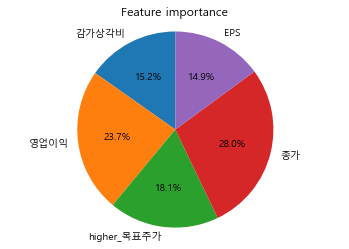

In [351]:
import matplotlib.pyplot as plt

data = [0.152, 0.237,0.181,0.279,0.149]
labels = ['감가상각비', '영업이익', 'higher_목표주가', '종가','EPS']

plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Feature importance')
plt.show()

In [352]:
print(model.get_params()['max_depth'])
print(model.get_params()['n_estimators'])

None
100


In [353]:
cv_score = cross_val_score(xgb_model, x_train_scaled, y_train, cv=5, scoring='accuracy')
print(cv_score.mean())

xgb_model.fit(X_train_val,y_train_val)
val_pred = xgb_model.predict(x_val)
val_proba = xgb_model.predict_proba(x_val)

accuracy = accuracy_score(y_val,val_pred)
recall = recall_score(y_val ,val_pred, average='macro')
auc = roc_auc_score(y_val, val_proba, multi_class='ovr', average='macro')
precision = precision_score(y_val,val_pred, average='macro')
conf = confusion_matrix(y_val, val_pred)
# f1 = f1_score(y_val,val_pred, average='weighted')
print(accuracy,auc,recall,precision)# ,f1)
print(conf)


pred = xgb_model.predict(x_test)
proba = xgb_model.predict_proba(x_test)

accuracy2 = accuracy_score(y_test, pred)
recall2 = recall_score(y_test, pred, average='macro')
auc2 = roc_auc_score(y_test,proba,multi_class='ovr', average='macro')
precision2 = precision_score(y_test,pred, average='macro')
confusion = confusion_matrix(y_test, pred)
# f1_weighted = f1_score(y_test, pred, average='weighted') 
print(accuracy2,auc2,recall2,precision2) #,f1_weighted)
print(confusion)

0.6914965986394557
0.8775510204081632 0.8331456444093129 0.6052287581699346 0.5742690058479533
[[28  0  2]
 [ 0  0  2]
 [ 2  0 15]]
0.4766355140186916 0.46149626517273584 0.3333333333333333 0.1588785046728972
[[ 0  0 51]
 [ 0  0  5]
 [ 0  0 51]]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

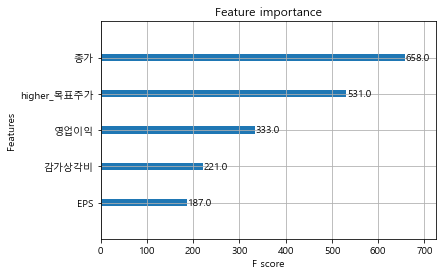

In [354]:
from xgboost import plot_importance
plot_importance(xgb_model)

In [355]:
print(xgb_model.get_params()['learning_rate'])
print(xgb_model.get_params()['max_depth'])
print(xgb_model.get_params()['n_estimators'])

0.300000012
6
100


In [356]:
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 4, 5],
# }

# # 그리드 서치 수행
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
# grid_search.fit(x_train, y_train)
# print(grid_search.best_params_)

In [357]:
cv_score = cross_val_score(lgbm_model, x_train_scaled, y_train, cv=5, scoring='accuracy')
print(cv_score.mean())

lgbm_model.fit(X_train_val,y_train_val)
val_pred = lgbm_model.predict(x_val)
val_proba = lgbm_model.predict_proba(x_val)

accuracy = accuracy_score(y_val,val_pred)
recall = recall_score(y_val ,val_pred, average='macro')
auc = roc_auc_score(y_val, val_proba, multi_class='ovr', average='macro')
precision = precision_score(y_val,val_pred, average='macro')
f1 = f1_score(y_val,val_pred, average='weighted')
print(accuracy,auc,recall,precision,f1)


pred =lgbm_model.predict(x_test)
proba = lgbm_model.predict_proba(x_test)

accuracy2 = accuracy_score(y_test, pred)
recall2 = recall_score(y_test, pred, average='macro')
auc2 = roc_auc_score(y_test,proba,multi_class='ovr', average='macro')
precision2 = precision_score(y_test,pred, average='macro')
# f1_weighted = f1_score(y_test, pred, average='weighted') 
print(accuracy2,auc2,recall2,precision2)#,f1_weighted)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 258
[LightGBM] [Info] Number of data points in the train set: 195, number of used features: 5
[LightGBM] [Info] Start training from score -0.628609
[LightGBM] [Info] Start training from score -3.193558
[LightGBM] [Info] Start training from score -0.854159
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

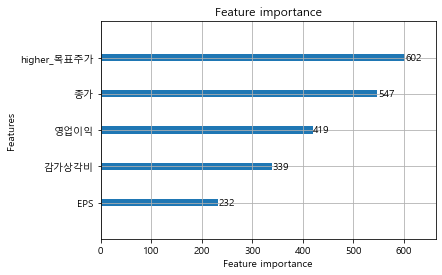

In [280]:
from lightgbm import plot_importance
plot_importance(lgbm_model)

In [281]:
print(lgbm_model.get_params()['learning_rate'])
print(lgbm_model.get_params()['max_depth'])
print(lgbm_model.get_params()['n_estimators'])

0.1
-1
100


In [282]:
len(result2)

297

In [283]:
result_시각화용 = result2.sort_values(['거래소코드','ym'])

In [284]:
result_시각화용.reset_index(drop=True, inplace=True)

In [285]:
len(result_시각화용['종가'].iloc[40:79])

39

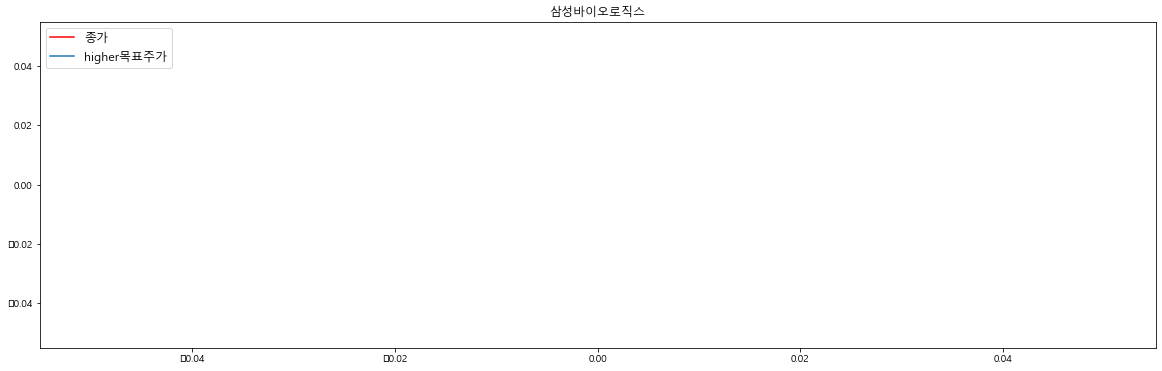

In [286]:
plt.figure(figsize=(20,6))
x1 = result_시각화용['종가'].iloc[320:359]
x2 = result_시각화용['higher_목표주가'].iloc[320:359]

# 뻥튀기 = x1 - x2
plt.plot(x1,c='r', label="종가")
plt.plot(x2, label='higher목표주가')
# plt.plot(뻥튀기)
plt.title("삼성바이오로직스", fontsize="large")
plt.legend(loc="upper left", fontsize="large")
plt.show()

In [287]:
result2

,거래소코드,ym,감가상각비,영업이익,higher_목표주가,6개월 수익률,업종수익률,업종6개월수익률,종가,EPS
0,000270,2020-01,11349666.666667,88656333.333333,37224.798000,0.150360,-0.015824,-0.138048,41677.500000,2883.000000
1,035720,2020-01,12935581.333333,26633138.000000,0.000000,-0.981964,0.034375,0.334105,163200.000000,623.000000
2,005490,2020-01,11650666.666667,144886075.000000,390280.146900,0.195578,-0.027603,-0.157108,235600.000000,20911.000000
3,068270,2020-01,15404333.333333,20174666.666667,294485.895600,-0.801065,0.027067,0.447093,174800.000000,1970.000000
4,207940,2020-01,434045.333333,12217675.333333,403930.340700,-0.683864,0.027067,0.447093,445275.000000,3387.000000
...,...,...,...,...,...,...,...,...,...,...
292,000270,2022-09,11696333.333333,152965000.000000,69608.950200,0.006888,-0.018818,-0.049680,78930.000000,11874.000000
293,005930,2022-09,134949666.666667,3129732666.666667,33367.374300,-0.099837,-0.066787,0.109580,55595.000000,5777.000000
294,005490,2022-09,12939333.333333,197212541.666667,172127.430000,-0.392954,-0.019282,0.072420,236825.000000,87330.000000
295,000660,2022-09,22128666.666667,367551000.000000,80799.065100,0.028290,-0.066787,0.109580,88195.000000,13989.000000


리포트

In [358]:
train_label = list(y_train)
test_label = list(rf_pred)
print(len(train_label))
print(len(test_label))
train_label.extend(test_label)
len(train_label)
Label = pd.DataFrame(train_label, columns=['Label'])
result2 = pd.concat([result2, Label],axis=1)
result2_전처리 = result2.sort_values(['거래소코드','ym'])
result2_전처리.reset_index(drop=True, inplace=True)

244
107


In [359]:
result2_전처리 = result2_전처리.iloc[:,:12]

In [360]:
def data_load(_path, _end, _encoding='cp949'):
    _path += '/' 
    file_list = os.listdir(_path)

    for file in file_list :
        # _end와 file의 확장자가 같은가?
        if file.split('.')[-1] == _end :
                ticker = file.split('.')[0][-8:]
                var_name = 'df_' + ticker
                globals()[var_name] = pd.read_csv(_path+file, encoding=_encoding)
                globals()[var_name] = globals()[var_name].loc[~globals()[var_name].isna().any(axis=1)]
                globals()[var_name]['일자'] = pd.to_datetime(globals()[var_name]['일자']).dt.strftime('%Y-%m-%d 00:00:00')
                globals()[var_name]['ym'] = pd.to_datetime(globals()[var_name]['일자']).dt.to_period('M')
                globals()[var_name]['ym'] = globals()[var_name]['ym'].astype(object)
                globals()[var_name].drop(columns='일자',inplace=True)
                # globals()[var_name]['목표주가'] = globals()[var_name]['목표주가'].str.replace(',','').str.split('원').str[0]
                # globals()[var_name]['목표주가'] = globals()[var_name]['목표주가'].astype(float)
                globals()[var_name] = globals()[var_name].groupby(['종목명','ym','투자의견']).mean().reset_index()
                globals()[var_name]['ym'] = globals()[var_name]['ym'].astype(str).str.split(' ', expand=True)
                # globals()[var_name]['Higher_Label'] = 0 
                # globals()[var_name]['Higher_Label'] = result2_전처리.loc[result2_전처리['거래소코드']==ticker]['Label']
                
        print(file)

    return globals()[var_name]

In [361]:
data_load('data/report_data/', 'csv')

SK하이닉스.csv
기아.csv
네이버.csv
삼성바이오로직스.csv
삼성전자.csv
셀트리온.csv
카카오.csv
포스코홀딩스.csv
현대차.csv


,종목명,ym,투자의견
0,현대차,2020-05,Buy(Initiate)
1,현대차,2020-07,Buy(Maintain)
2,현대차,2020-08,Buy(Maintain)
3,현대차,2020-10,Buy(Maintain)
4,현대차,2021-01,Buy(Maintain)
5,현대차,2021-02,Buy(Maintain)
6,현대차,2021-03,Buy(Maintain)
7,현대차,2021-04,Buy(Maintain)
8,현대차,2021-06,Buy(Maintain)
9,현대차,2021-07,Buy(Maintain)


In [362]:
df_삼성바이오로직스

,종목명,ym,투자의견
0,삼성바이오로직스,2020-02,Outperfrom(Maintain)
1,삼성바이오로직스,2020-04,Outperfrom(Maintain)
2,삼성바이오로직스,2020-07,Outperfrom(Maintain)
3,삼성바이오로직스,2020-08,Outperform(Upgrade)
4,삼성바이오로직스,2020-10,Buy(Upgrade)
5,삼성바이오로직스,2021-01,Buy(Maintain)
6,삼성바이오로직스,2021-04,Buy(Maintain)
7,삼성바이오로직스,2021-07,Buy(Maintain)
8,삼성바이오로직스,2021-10,Buy(Maintain)
9,삼성바이오로직스,2021-11,Buy(Maintain)


In [363]:
kia = pd.DataFrame(result2_전처리.loc[result2_전처리['거래소코드']=='000270']['Label'].astype(object))
kia.reset_index(drop=True,inplace=True)
sk = pd.DataFrame(result2_전처리.loc[result2_전처리['거래소코드']=='000660']['Label'].astype(object))
sk.reset_index(drop=True,inplace=True)
hyundai = pd.DataFrame(result2_전처리.loc[result2_전처리['거래소코드']=='005380']['Label'].astype(object))
hyundai.reset_index(drop=True,inplace=True)
posco = pd.DataFrame(result2_전처리.loc[result2_전처리['거래소코드']=='005490']['Label'].astype(object))
posco.reset_index(drop=True,inplace=True)
samsung = pd.DataFrame(result2_전처리.loc[result2_전처리['거래소코드']=='005930']['Label'].astype(object))
samsung.reset_index(drop=True,inplace=True)

naver = pd.DataFrame(result2_전처리.loc[result2_전처리['거래소코드']=='035420']['Label'].astype(object))
naver.reset_index(drop=True,inplace=True)

kakao = pd.DataFrame(result2_전처리.loc[result2_전처리['거래소코드']=='035720']['Label'].astype(object))
kakao.reset_index(drop=True,inplace=True)

celltrion = pd.DataFrame(result2_전처리.loc[result2_전처리['거래소코드']=='068270']['Label'].astype(object))
celltrion.reset_index(drop=True,inplace=True)

ssbio = pd.DataFrame(result2_전처리.loc[result2_전처리['거래소코드']=='207940']['Label'].astype(object))
ssbio.reset_index(drop=True,inplace=True)


In [364]:
df_000270 = pd.concat([df_000270[['ym']],kia],axis=1)
df_000660 = pd.concat([df_000660[['ym']],sk],axis=1)
df_005380 = pd.concat([df_005380[['ym']],hyundai],axis=1)
df_005490 = pd.concat([df_005490[['ym']],posco],axis=1)
df_005930 = pd.concat([df_005930[['ym']],samsung],axis=1)
df_035420 = pd.concat([df_035420[['ym']],naver],axis=1)
df_035720 = pd.concat([df_035720[['ym']],kakao],axis=1)
df_068270 = pd.concat([df_068270[['ym']],celltrion],axis=1)
df_207940 = pd.concat([df_207940[['ym']],ssbio],axis=1)


In [365]:
df_000660

,ym,Label
0,2020-01,2
1,2020-02,2
2,2020-03,2
3,2020-04,0
4,2020-05,0
5,2020-06,0
6,2020-07,0
7,2020-08,0
8,2020-09,0
9,2020-10,0


In [295]:
# for j in ticker_list:
#     기업별Label = pd.DataFrame(result2_전처리.loc[result2_전처리['거래소코드']==j]['Label'].astype(object),columns=['Higher_Label'])
#     기업별Label.reset_index(drop=True, inplace=True)
#     for i in ticker_df:
#         # i['Higher_Label'] = 기업별Label['Higher_Label'].values
#         globals()[i] = i.loc[~i.isna().any(axis=1)]
#         # i = pd.concat([i,기업별Label],axis=1)
#         # globals()[i] = globals()[i][['거래소코드','ym','Higher_Label']]
        
        

In [375]:
report_kia = pd.merge(df_삼성전자, df_005930, on='ym', how='left')
report_kia['Label'] = report_kia['Label'].replace(0,'Sell(0)').replace(1,'Hold(1)').replace(2,'Buy(2)')
report_kia.columns=['종목명','년월','키움증권_투자의견','Higher_투자의견']
report_kia.set_index('년월',inplace=True)
report_kia

,종목명,키움증권_투자의견,Higher_투자의견
년월,,,
2020-01,삼성전자,BUY(Maintain),Hold(1)
2020-03,삼성전자,BUY(Maintain),Sell(0)
2020-04,삼성전자,BUY(Maintain),Sell(0)
2020-05,삼성전자,BUY(Maintain),Sell(0)
2020-07,삼성전자,BUY(Maintain),Sell(0)
2020-09,삼성전자,BUY(Maintain),Sell(0)
2020-10,삼성전자,BUY(Maintain),Sell(0)
2020-11,삼성전자,BUY(Maintain),Sell(0)
2020-12,삼성전자,BUY(Maintain),Sell(0)


In [ ]:
report_sk = pd.merge(df_네이버, df_035420, on='ym', how='left')
report_sk['Label'] = report_sk['Label'].replace(0,'Sell(0)').replace(1,'Hold(1)').replace(2,'Buy(2)')
report_sk.columns=['종목명','년월','키움증권_투자의견','Higher_투자의견']
report_sk.set_index('년월',inplace=True)
report_sk

,종목명,키움증권_투자의견,Higher_투자의견
년월,,,
2020-01,NAVER,BUY(Maintain),Sell(0)
2020-04,NAVER,BUY(Maintain),Sell(0)
2020-07,NAVER,BUY(Maintain),Sell(0)
2020-09,NAVER,BUY(Maintain),Sell(0)
2020-10,NAVER,BUY(Maintain),Sell(0)
2020-11,NAVER,BUY(Maintain),Sell(0)
2021-01,NAVER,BUY(Maintain),Sell(0)
2021-04,NAVER,BUY(Maintain),Sell(0)
2021-05,NAVER,BUY(Maintain),Sell(0)


In [ ]:
report_sk = pd.merge(df_삼성바이오로직스, df_207940, on='ym', how='left')
report_sk['Label'] = report_sk['Label'].replace(0,'Sell(0)').replace(1,'Hold(1)').replace(2,'Buy(2)')
report_sk.columns=['종목명','년월','키움증권_투자의견','Higher_투자의견']
report_sk.set_index('년월',inplace=True)
report_sk

,종목명,키움증권_투자의견,Higher_투자의견
년월,,,
2020-02,삼성바이오로직스,Outperfrom(Maintain),Sell(0)
2020-04,삼성바이오로직스,Outperfrom(Maintain),Sell(0)
2020-07,삼성바이오로직스,Outperfrom(Maintain),Sell(0)
2020-08,삼성바이오로직스,Outperform(Upgrade),Sell(0)
2020-10,삼성바이오로직스,Buy(Upgrade),Sell(0)
2021-01,삼성바이오로직스,Buy(Maintain),Sell(0)
2021-04,삼성바이오로직스,Buy(Maintain),Sell(0)
2021-07,삼성바이오로직스,Buy(Maintain),Hold(1)
2021-10,삼성바이오로직스,Buy(Maintain),Buy(2)
